In [1]:
def dme_ionization_ff(shell, e_er, q,argon=False):
    from electron import shell_str,argon_shell_data,shell_data
    """Return dark matter electron scattering ionization form factor

    Outside the parametrized range, the form factor is assumed 0
    to give conservative results.

    :param shell: Name of atomic shell, e.g. '4p'
        Note not all shells are included in the data.
    :param e_er: Electronic recoil energy
    :param q: Momentun transfer
    """
    if isinstance(shell, tuple):
        shell = shell_str(*shell,argon=argon)
    
    if argon:
        shelldata = argon_shell_data
    else:
        shelldata = shell_data
    lnq = np.log(q / (nu.me * nu.c0 * nu.alphaFS))
    # From Mathematica: (*ER*) (2 lnkvalues[[j]])/Log[10]
    # log10 (E/Ry) = 2 lnk / ln10
    # lnk = log10(E/Ry) * ln10 / 2
    #     = lng(E/Ry) / 2
    # Ry = rydberg = 13.6 eV
    ry = nu.me * nu.e ** 4 / (8 * nu.eps0 ** 2 * nu.hPlanck ** 2)   
    # print('q','e_r/ry')
    # print(q/(nu.me * nu.c0 * nu.alphaFS),e_er/ry)

    lnk = np.log(e_er / ry) / 2
        

    # print(lnk,lnq)
    return 10**(shelldata[shell]['log10ffsquared_itp'](
        np.vstack([lnk, lnq]).T))

def v_min_dme(eb, erec, q, mw):
    """Minimal DM velocity for DM-electron scattering
    :param eb: binding energy of shell
    :param erec: electronic recoil energy energy
    :param q: momentum transfer
    :param mw: DM mass
    """
    return (erec + eb) / q + q / (2 * mw)


In [2]:
import numericalunits as nu
import numpy as np
from electron import inverse_mean_speed_kms,binding_es_for_dme,shell_data
from scipy.integrate import quad
mw = 1e9 * nu.eV/nu.c0**2 #GeV
erec = np.geomspace(1,400,100) *nu.eV
# er = erec[1]
eb =  25.7* nu.eV #for 5s

shell = '5s'
qmax = (np.exp(shell_data[shell]['lnqs'].max()))
    # print('QMAX',qmax)#eV))
# qmax *= nu.me * nu.c0 * nu.alphaFS
qs = np.geomspace(1,qmax,100) * nu.me * nu.c0 * nu.alphaFS
q_unit_testing = qs[-5:]
# print(q_unit_testing/ (nu.kg * nu.m / nu.s))
vmins = v_min_dme(eb, erec, qs, mw)
vmins_converted = (vmins / (nu.km/nu.s))
etas = inverse_mean_speed_kms(vmins_converted)
etas *= nu.s / nu.km
result = etas * dme_ionization_ff(shell,erec,qs)
print(result)

 # cm^2 * (c^2 / eV^2) #eV/c * eV/c * unitless * unitless * s/cm  =  cm * s 
# def diff_xsec(q):
#     # print('q')
#     # print(q / (nu.kg * nu.m / nu.s)) #units of q are moomentum
#     vmin = v_min_dme(eb, erec, q, mw)
#     result = q * dme_ionization_ff(shell, erec, q) 
#     # print(result)
#     # Note the interpolator is in kms, not unit-carrying numbers
#     # see above
#     eta = inverse_mean_speed_kms(vmin/ (nu.km/nu.s))
#     # print('eta')
#     # print(eta)
#     eta *= (nu.s/nu.km)
#     # print('eta converted into s/km')
#     # print(eta)

#     result *=eta
#     return result

# test = diff_xsec(er,qmax) 
# r = quad(diff_xsec, 0, qmax)[0]

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 4.05512955e-14 2.32648706e-13
 5.35789824e-13 7.41903817e-13 8.39772785e-13 9.21921395e-13
 1.03132911e-12 1.00045902e-12 2.36404589e-12 6.56666002e-12
 1.58033439e-11 2.90923661e-11 5.33013227e-11 7.91662291e-11
 1.09977476e-10 1.41729120e-10 1.68149774e-10 1.93894588e-10
 1.96332629e-10 1.96796592e-10 1.84826195e-10 1.61111540e-10
 1.39040112e-10 1.04758885e-10 7.79644336e-11 5.11566327e-11
 3.03290185e-11 1.76322823e-11 8.12887198e-12 3.78650576e-12
 3.70886881e-12 5.80562793e-12 8.72708206e-12 1.18481216e-11
 1.60338080e-11 1.856301

In [18]:
# import numpy as np
# import numericalunits as nu
# key = '5s'
# isd = shell_data['5s']
# qmax = (np.exp(isd['lnqs'].max()))
# qs = np.linspace(0,qmax,100)
# # qmax *= nu.me * nu.c0 * nu.alphaFS
# # qs *= nu.me * nu.c0 * nu.alphaFS



# erec = np.geomspace(1,400,100)
# ffs = np.zeros((len(qs),len(erec)))

# for i,q in enumerate(qs):
#     for j,er in enumerate(erec):
#         print('q',q,'er',er)
#         ffs[i,j] = dme_ionization_ff(shell, er*nu.eV, q*nu.me * nu.c0 * nu.alphaFS) 
        

q 0.0 er 1.0
-1.3052441585626346 -inf
q 0.0 er 1.0623886793066823
-1.274984236607544 -inf
q 0.0 er 1.128669705918997
-1.244724314652453 -inf
q 0.0 er 1.1990859182447446
-1.2144643926973624 -inf
q 0.0 er 1.273895305059275
-1.1842044707422714 -inf
q 0.0 er 1.3533719507169064
-1.1539445487871807 -inf
q 0.0 er 1.4378070393328426
-1.1236846268320897 -inf
q 0.0 er 1.5275099216146697
-1.093424704876999 -inf
q 0.0 er 1.6228092482520629
-1.0631647829219082 -inf
q 0.0 er 1.7240541740171793
-1.0329048609668172 -inf
q 0.0 er 1.8316156369872842
-1.0026449390117265 -inf
q 0.0 er 1.945887717576389
-0.9723850170566356 -inf
q 0.0 er 2.067289082355074
-0.9421250951015449 -inf
q 0.0 er 2.1962645179483307
-0.911865173146454 -inf
q 0.0 er 2.3332865606312545
-0.8816052511913632 -inf
q 0.0 er 2.47885722759307
-0.8513453292362724 -inf
q 0.0 er 2.6335098562124255
-0.8210854072811815 -inf
q 0.0 er 2.79781105808265
-0.7908254853260908 -inf
q 0.0 er 2.9723627949460583
-0.7605655633709999 -inf
q 0.0 er 3.157804584

/var/folders/k8/_jhxw6sx2gj8wjzbhc789q540000gn/T/ipykernel_80261/2298510995.py:21: RuntimeWarning: divide by zero encountered in log
  lnq = np.log(q / (nu.me * nu.c0 * nu.alphaFS))
/var/folders/k8/_jhxw6sx2gj8wjzbhc789q540000gn/T/ipykernel_80261/172038371.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ffs[i,j] = dme_ionization_ff(shell, er*nu.eV, q*nu.me * nu.c0 * nu.alphaFS)


q 41.913731338575374 er 142.96891094358662
1.1760694417548128 3.7356134901517413
q 41.913731338575374 er 151.8885524792716
1.2063293637099033 3.7356134901517413
q 41.913731338575374 er 161.36467867025715
1.2365892856649943 3.7356134901517413
q 41.913731338575374 er 171.4320078592416
1.2668492076200848 3.7356134901517413
q 41.913731338575374 er 182.12742442047258
1.297109129575176 3.7356134901517413
q 41.913731338575374 er 193.49011389559337
1.3273690515302665 3.7356134901517413
q 41.913731338575374 er 205.56170656043912
1.3576289734853577 3.7356134901517413
q 41.913731338575374 er 218.3864299487726
1.3878888954404482 3.7356134901517413
q 41.913731338575374 er 232.01127089177794
1.4181488173955392 3.7356134901517413
q 41.913731338575374 er 246.48614766698077
1.4484087393506297 3.7356134901517413
q 41.913731338575374 er 261.86409288731573
1.478668661305721 3.7356134901517413
q 41.913731338575374 er 278.20144780039766
1.5089285832608115 3.7356134901517413
q 41.913731338575374 er 295.55806

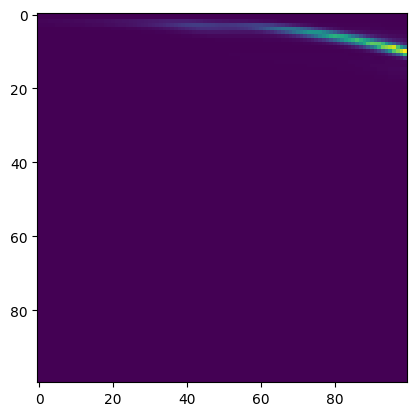

In [19]:
import matplotlib.pyplot as plt
plt.imshow(ffs)